In [39]:
import pandas as pd
import librosa
import librosa.display
import matplotlib.pylab as plt


In [40]:
sample_music = pd.read_csv('/Users/BenH/Desktop/Thrive/Data/features_30_sec.csv')
sample_music.tail(5)

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
996,rock.00096.wav,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,...,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624,rock
997,rock.00097.wav,661794,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,...,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515,rock
998,rock.00098.wav,661794,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.731073,1818.450280,109090.207161,...,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088,rock
999,rock.00099.wav,661794,0.358401,0.085884,0.054454,0.000336,1609.795082,422203.216152,1797.213044,120115.632927,...,59.167755,-7.069775,73.760391,0.028346,76.504326,-2.025783,72.189316,1.155239,49.662510,rock
1000,rock.000100.wav,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,...,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624,rock


In [41]:
import sklearn
import numpy as np
import os 

In [5]:
y, sr = librosa.load('/Users/BenH/Desktop/Thrive/Data/genres_original/jazz/jazz.00004.wav')
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
print('Tempo: {:2f}'.format(tempo))

Tempo: 64.599609


In [6]:
beat_frames

array([  68,  111,  152,  193,  238,  279,  320,  361,  401,  442,  486,
        527,  567,  607,  647,  690,  732,  771,  810,  853,  895,  936,
        978, 1019, 1060, 1100, 1141, 1183])

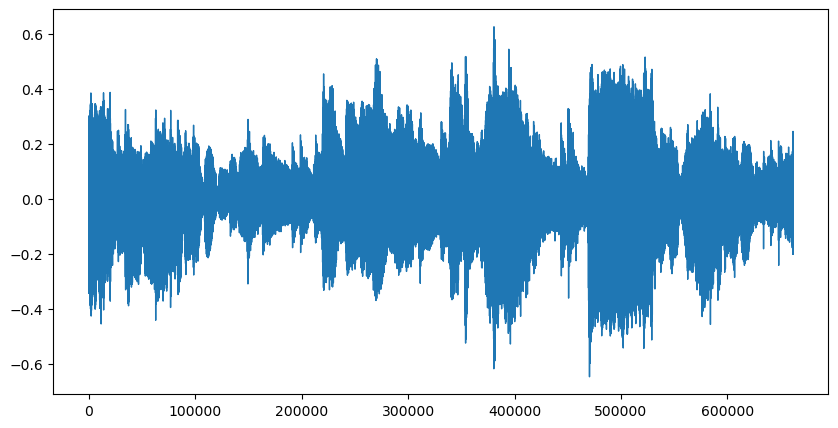

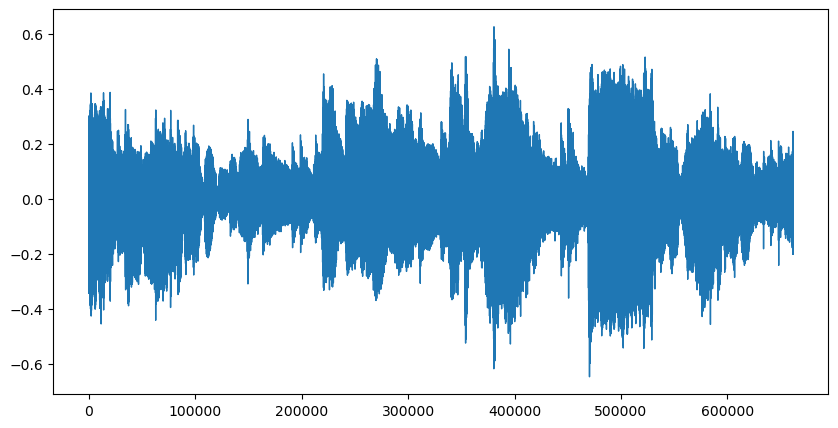

In [7]:

pd.Series(y).plot(figsize = (10,5), lw=1)
plt.show()
#SHOW THIS WITH AN AUDIO THAT WILL ACTUALLY SHOW IT BEING TRIMMED
y_trim, _ = librosa.effects.trim(y)
pd.Series(y_trim).plot(figsize = (10,5), lw=1)
plt.show()

In [8]:
d = librosa.stft(y)
d_deci = librosa.amplitude_to_db(np.abs(d), ref = np.max)
d_deci.shape


(1025, 1293)

In [9]:
d_deci

array([[-38.293674, -45.994236, -65.27995 , ..., -51.200485, -52.798904,
        -30.50072 ],
       [-37.97537 , -43.963135, -55.46855 , ..., -60.452904, -46.764324,
        -30.289995],
       [-37.467773, -43.840595, -56.81787 , ..., -52.81012 , -48.378693,
        -30.11162 ],
       ...,
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -76.51524 ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -76.3961  ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -76.40434 ]], dtype=float32)

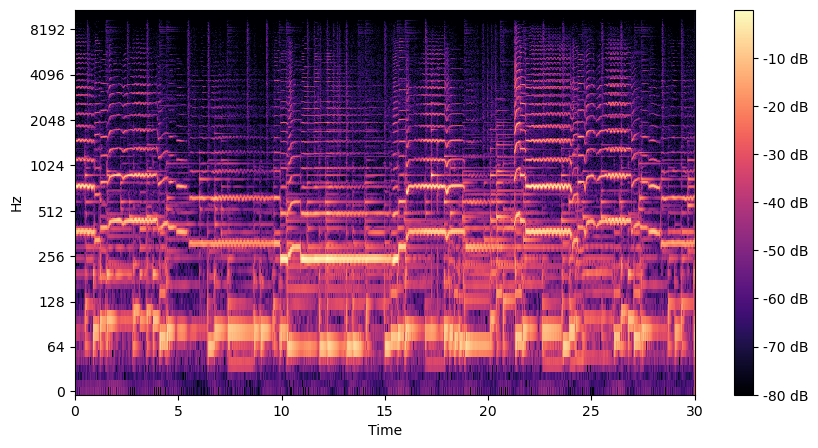

In [10]:
fig, ax = plt.subplots(figsize=(10,5))
spec = librosa.display.specshow(d_deci, x_axis='time', y_axis='log', ax=ax)
fig.colorbar(spec, ax=ax, format='%+2.0f dB')
plt.show()
#SHOW MEL SPECTOGRAM AS WELL

<Axes: >

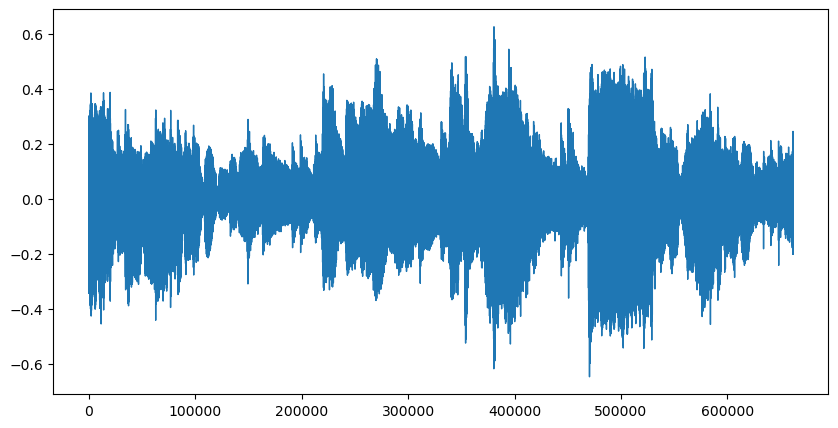

In [11]:
pd.Series(y_trim).plot(figsize = (10,5), lw=1)

<Axes: >

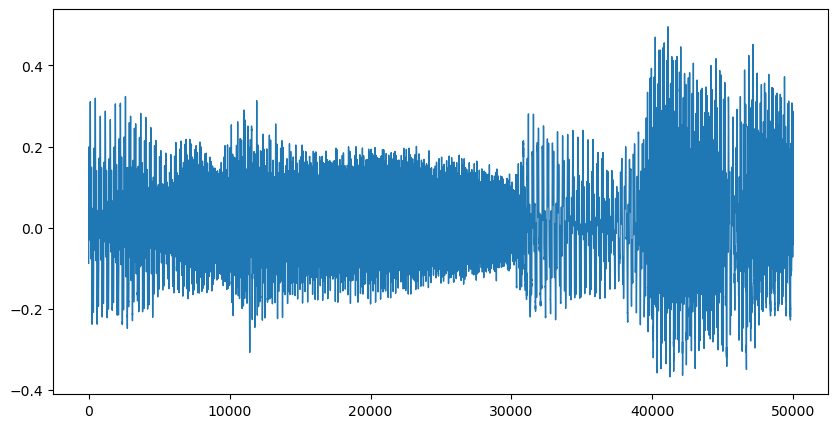

In [12]:
pd.Series(y_trim[300000:350000]).plot(figsize = (10,5), lw=1)

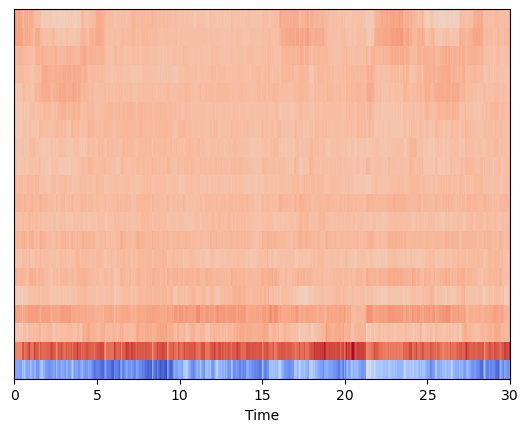

In [13]:
y, sr = librosa.load('/Users/BenH/Desktop/Thrive/Data/genres_original/jazz/jazz.00004.wav')
mfccs = librosa.feature.mfcc(y=y, sr=sr)
librosa.display.specshow(mfccs, sr=sr, x_axis = 'time')

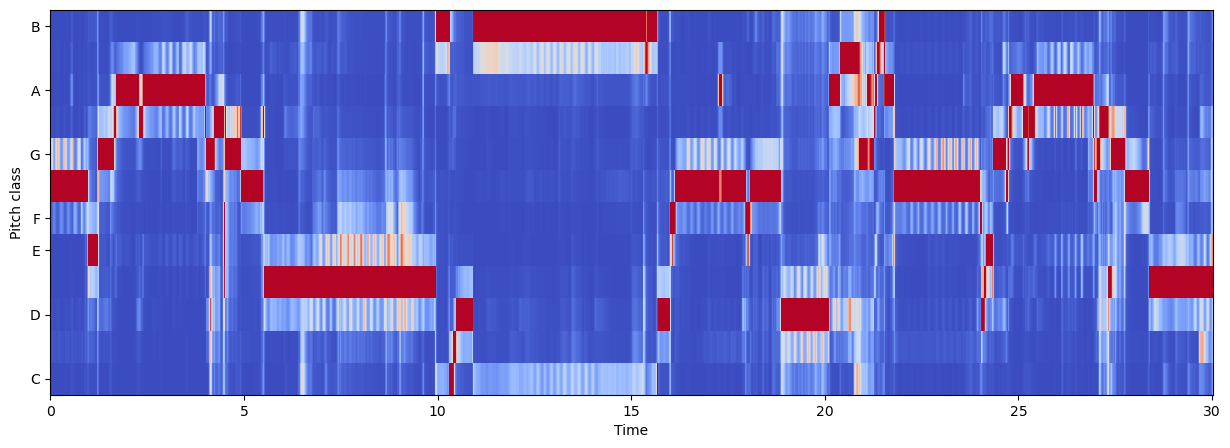

In [14]:
hop = 512
chromagram = librosa.feature.chroma_stft(y=y, sr=sr, hop_length=hop)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop, cmap='coolwarm')

In [15]:
#This is to get the root mean square
rms = librosa.feature.rms(y=y)
rms

array([[0.10005803, 0.12790911, 0.16098782, ..., 0.07253473, 0.07810637,
        0.07283746]], dtype=float32)

In [16]:
rms.shape

(1, 1293)

In [17]:
#This is to get the spectral centroid
spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
spec_cent

array([[1490.84829998, 1499.84176917, 1610.19528972, ...,  762.2357136 ,
         579.48665612,  744.59627573]])

In [18]:
spec_cent.shape

(1, 1293)

NameError: name 'minmax_scale' is not defined

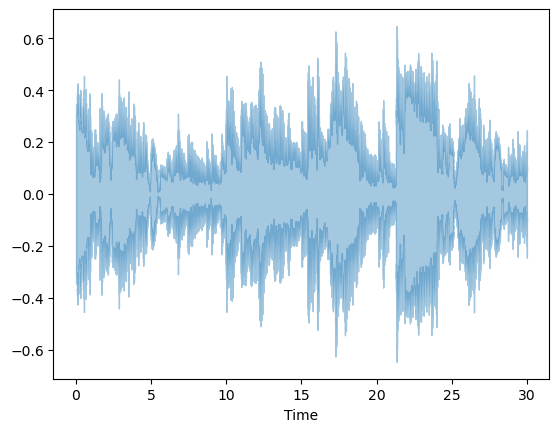

In [19]:
#GET THIS WORKING 
spec_time = range(len(spec_cent))
f = librosa.frames_to_time(spec_time)
librosa.display.waveshow(y, sr=sr, alpha=0.4)
plt.plot(f, minmax_scale(spec_cent, axis=0), color='r')


NameError: name 'minmax_scale' is not defined

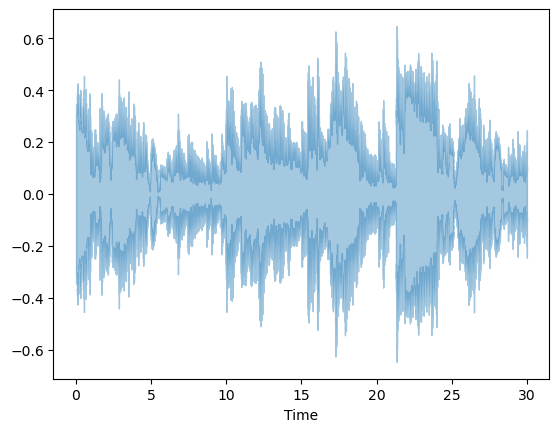

In [22]:
#AND THIS 
spec_time = range(len(spec_cent))
f = librosa.frames_to_time(spec_time)
librosa.display.waveshow(y=y, sr=sr, alpha=0.4)
plt.plot(f, minmax_scale(spec_cent, axis=0))

In [23]:
#This is how you get the spectral rolloff
spec_roll = librosa.feature.spectral_rolloff(y=y, sr=sr)
spec_roll

array([[2993.11523438, 3025.41503906, 3359.1796875 , ...,  958.22753906,
         829.02832031,  958.22753906]])

In [24]:
spec_roll.shape

(1, 1293)

In [25]:
#This is how you get the zero crossing rate
z_cross = librosa.zero_crossings(y=y)
print(sum(z_cross))
#COULD CREATE THESE ALL INTO FUNCTIONS SO THAT YOU CAN JUST CALL GET_CROSSING_COUNT(y) AND IT RETURN THE VALUE 


31643


In [76]:
#This is how you get the harmony 
#harm, perc = librosa.effects.hpss(y)
#harm
#PLOT EACH OF THE SPECTRALL ROLLOFF ETC

ModuleNotFoundError: No module named 'numba.core.inline_closurecall'

In [26]:
#Multiple linear regression
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

data = pd.read_csv('/Users/BenH/Desktop/Thrive/Data/features_30_sec.csv')

y = data['label']
x = data.loc[:, data.columns != 'label'] #could do drop label here instead 

cols = x.columns
#min_max_scalar = preprocessing.MinMaxScalar()
#np_scaled = min_max_scalar.fit_transform(x)

x = pd.DataFrame(x, columns = cols)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
#print(confusion_matrix(y_test, preds))
print('Accuracy', 'DecisionTreeClassifier', ':', round(accuracy_score(y_test, preds), 5), '\n')


ValueError: could not convert string to float: 'blues.00029.wav'

In [27]:
data = pd.read_csv('/Users/BenH/Desktop/Thrive/Data/features_30_sec.csv')
data['filename'] = data['filename'].astype('category')
data['filename'] = data['filename'].cat.codes


data.isnull().sum()

filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var     

In [28]:
#y = m1x1 + m2x2 + m3x3 ... + c
x = data.drop(columns = ['label', 'filename'])
x

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,...,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035
1,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,...,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282
2,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,...,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025
3,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,...,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339
4,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,...,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,661794,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,88609.749506,4253.557033,...,1.789867,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665
996,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,4149.338328,...,3.739020,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624
997,661794,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,4031.405321,...,1.838090,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515
998,661794,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.731073,1818.450280,109090.207161,3015.631004,...,-2.812176,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088


In [29]:
y = data['filename']
y

0        0
1        1
2        2
3        3
4        4
      ... 
995    995
996    996
997    997
998    998
999    999
Name: filename, Length: 1000, dtype: int16

In [30]:
#Split the dataset 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [31]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
c = lr.intercept_
c

7760.126118265842

In [32]:
m = lr.coef_
m

array([-1.30435623e-02,  3.89443773e+02,  1.22388209e+03, -6.50903415e+02,
       -1.22507451e+04,  7.87529443e-01, -8.20037430e-05,  3.24970611e-02,
        5.15268826e-05, -1.50876998e-01,  8.71036627e-05, -4.90310216e+03,
        1.45209029e+04, -6.28207059e+03,  1.74491694e+03, -1.92800535e+03,
        2.28915034e+03,  3.16126060e-01,  1.08357185e-01,  2.68350059e-03,
        3.86207616e+00, -6.43197277e-02, -4.03076865e+00,  3.10285026e-02,
        1.40679247e+00,  1.22926435e-01, -4.22181762e+00, -5.50262832e-01,
        1.01710932e+00,  2.09825442e-01,  2.27283514e+00,  2.98082956e-01,
        4.90464600e+00, -1.88869627e-01,  6.16357368e+00,  2.73167952e-01,
       -6.12558339e+00,  1.47368126e-01,  4.51546400e+00, -5.27621832e-01,
        5.26604180e+00, -6.80682480e-02, -7.41395611e-01, -1.06494214e+00,
        6.93586907e-01,  1.83067705e-01,  7.04220688e+00,  5.32367602e-01,
       -1.10655730e+01,  3.28230762e-01, -5.74795608e+00,  3.79881000e-01,
        6.90085281e+00,  

In [33]:
y_pred_train = lr.predict(x_train)
y_pred_train

array([ 350.41845334,  434.81370968,  837.57969594,  514.77179067,
        556.38856529,  410.07332324,  486.6137995 ,  402.85457735,
        525.50782619,  644.26011971,  548.98809542,  360.84743535,
        572.75093691,  244.90532637,  541.48542819,  483.23444687,
        743.78270524,  414.58361666,  387.7064591 ,  176.50944942,
         -3.42253582,  533.28257455,  547.20762684,  180.54198893,
        336.82765437,  337.28351213,  424.62071107,  260.00441154,
        577.46488782,  551.97135704,  674.77234787,  767.57323733,
        408.95789154,  587.32168492,  446.02813288,  527.13053011,
        251.9801053 ,  583.28955366,  599.46599341,  702.81485675,
        742.27661742,  543.72705826,   54.18016968,  181.92754869,
        406.55664246,  496.41483211,  165.61043582,  270.63076578,
        337.53933756,  471.91015517,  676.42812254,  515.96423812,
        469.88268054,  792.38575586,  619.57497114,  740.97799358,
        626.24224027,  636.31840133,  579.26761225,  536.99885

In [34]:
#import matplotlib.pyplot as plt
#plt.scatter(y_train, y_pred_train)
#plt.xlabel("Actual value")
#plt.ylabel("Predicted value")
#plt.show()

from sklearn.metrics import r2_score

r2_score(y_train, y_pred_train)

0.3782582980393101

In [35]:
y_pred_test = lr.predict(x_test)
r2_score(y_train, y_pred_train)

0.3782582980393101

In [36]:
data = pd.read_csv('/Users/BenH/Desktop/Thrive/Data/features_3_sec.csv')
data['filename'] = data['filename'].astype('category')
data['filename'] = data['filename'].cat.codes

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 50)
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_train = lr.predict(x_train)
r2_score(y_train, y_pred_train)

0.3715409388080023

In [37]:
#Trying to make it more accurate 
#Removing the irrelevant data 
#Remove length 
x_train


,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
788,661504,0.431329,0.088811,0.234867,0.016920,3510.331686,1.323744e+06,3148.384413,175836.846033,7255.465408,...,-2.892710,50.567184,0.607320,70.601929,0.886025,60.377766,2.312880,76.656578,1.927778,72.971756
579,661794,0.338348,0.084579,0.069850,0.000386,2634.043030,3.609089e+05,2728.240133,118663.560223,5561.653325,...,-1.081032,95.797638,-1.760361,98.465599,-5.186886,61.105072,-5.654775,68.589348,-9.772271,93.788239
554,662112,0.278270,0.083737,0.162394,0.002747,1670.233117,2.555610e+05,2109.438546,191916.069574,3464.041727,...,-0.876081,44.333191,-5.273277,56.501907,-1.605975,60.769760,-2.932240,52.397224,-1.418922,100.980064
882,661504,0.473389,0.092889,0.179540,0.010025,2566.692787,9.810428e+05,2629.515115,217422.907860,5313.538532,...,5.868603,64.311592,3.114095,45.141228,0.045928,42.989574,-1.550689,71.966965,-1.278760,76.823982
44,661794,0.390175,0.086310,0.136321,0.000474,2278.961252,1.708959e+05,2375.248703,53001.834698,5198.594860,...,12.336756,61.278839,0.020517,73.334106,-0.743094,56.243980,-5.130960,95.965195,3.297938,92.569382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,661794,0.322182,0.090080,0.104694,0.002267,1321.594969,5.112559e+05,1667.172895,218505.975278,2583.801185,...,3.149991,91.918770,-4.527203,113.716003,2.653756,85.186592,-3.113206,75.849648,-10.711282,84.838158
109,661794,0.270524,0.082300,0.023803,0.000200,1216.187786,1.210414e+05,1582.826588,72868.681171,2560.003081,...,-0.289919,79.411140,-0.660842,80.768044,1.160319,105.002167,-0.618511,92.521919,-0.254033,88.053047
907,661794,0.359193,0.087748,0.157097,0.003632,1282.165909,2.997257e+05,1729.518368,171959.030252,2675.787764,...,-1.629552,50.379608,-6.494120,53.031662,-4.714331,49.594494,-2.569852,34.244099,-1.788253,28.855711
480,661504,0.403840,0.097620,0.141423,0.000649,3377.753402,8.194760e+05,2997.025253,136532.866941,6893.997369,...,5.163290,60.614422,-0.832116,74.233589,4.851249,53.029705,0.242057,40.654781,-4.865187,51.150837


In [38]:
x_test

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
316,667920,0.435249,0.082908,0.205773,0.001938,2520.400967,5.209609e+05,2562.657872,182534.866162,5334.780947,...,0.101949,68.835655,-3.841879,56.086933,-0.497997,57.013794,-3.417327,56.913403,-0.765811,64.067360
459,661794,0.499723,0.078196,0.151300,0.002688,1948.937530,6.541679e+05,2286.013831,279514.512627,4218.975674,...,-0.449804,36.750526,-2.464082,36.492332,-3.869461,38.315750,-1.695695,34.714657,-2.753621,36.753723
854,661504,0.396361,0.092990,0.096916,0.002183,2542.615358,1.668360e+06,2726.347724,537337.420813,5477.877008,...,2.197425,59.070686,-3.219493,63.452660,0.765341,71.073715,-1.691892,70.961609,-0.636241,84.670158
11,661794,0.367152,0.102329,0.065741,0.002500,1352.659665,5.121351e+05,1756.779795,220626.791978,2880.777863,...,-2.994559,54.576809,-3.386818,39.840645,-1.852647,46.749706,1.839963,37.066483,-4.890803,28.149181
978,661794,0.358062,0.091999,0.144420,0.002087,1878.549952,5.215144e+05,2204.936033,137103.364367,4287.030921,...,0.508521,56.954388,-12.770678,34.306484,-4.898369,52.004292,-2.520796,68.188065,-3.129907,50.047249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,661794,0.437934,0.094721,0.252890,0.013661,1821.519761,7.452975e+05,2522.060569,309565.051070,4003.377184,...,-0.989756,49.640724,-5.466094,51.848621,-1.297010,42.504318,-4.247594,39.925827,-5.021968,58.707275
115,661794,0.216650,0.084129,0.011433,0.000088,1371.280858,1.115578e+05,1562.114726,63117.191939,2619.689856,...,6.186136,163.772018,7.161440,138.801865,3.840835,224.231369,2.599433,291.526215,4.933314,268.553925
42,661794,0.377538,0.092428,0.111001,0.000527,2301.609667,2.051984e+05,2367.518781,47313.158909,5187.578454,...,10.235481,81.953705,-4.078413,67.334839,-5.850137,95.960312,-2.477926,164.219696,6.646699,108.991432
383,661504,0.414105,0.090055,0.087591,0.001086,1959.005961,4.628733e+05,2210.522823,141140.051723,4351.905316,...,4.895351,67.416603,-9.716414,72.714401,1.520321,65.615753,-5.568986,64.936607,-2.062441,60.424400


In [82]:
y, sr = librosa.load('/Users/BenH/Desktop/Thrive/Data/genres_original/blues/blues.00005.wav')

#chroma_stft_mean
chroma = librosa.feature.chroma_stft(y=y, sr=sr)

new_chroma = (sum(chroma) / len(chroma))
print(sum(new_chroma) / len(new_chroma))

0.3025218692405779


In [57]:
import statistics 
import itertools
#chroma_stft_var

#need to flatten the 2d list into 1d
flattened_chroma = itertools.chain.from_iterable(chroma)
print(statistics.variance(flattened_chroma))

0.0939909


In [65]:

#rms_mean
rms = librosa.feature.rms(y=y)
new_rms = (sum(rms)/len(rms))
print((sum(new_rms)/len(new_rms)))


0.14175195082602915


In [66]:
#rms_var

flattened_rms = itertools.chain.from_iterable(rms)
print(statistics.variance(flattened_rms))

0.0087888725


In [69]:

#spectral_centroid_mean

spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
new_spec_cent = (sum(spec_cent)/len(spec_cent))
print((sum(new_spec_cent)/len(new_spec_cent)))

1459.4696906334643


In [70]:
#spectral_centroid_var

flattened_spec_cent = itertools.chain.from_iterable(spec_cent)
print(statistics.variance(flattened_spec_cent))

438364.02678211045


In [71]:
#spectral_bandwidth_mean

spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
new_spec_bw = (sum(spec_bw)/len(spec_bw))
print((sum(new_spec_bw)/len(new_spec_bw)))


1389.0684455609635


In [72]:
#spectral_bandwidth_var
flattened_spec_bw = itertools.chain.from_iterable(spec_bw)
print(statistics.variance(flattened_spec_bw))



185299.63104241202


In [83]:
#rolloff_mean
#through trial and error I was able to find that they used a rol_percent of 0.85
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.85)
new_rolloff = (sum(rolloff)/len(rolloff))
print((sum(new_rolloff)/len(new_rolloff)))

3481.4676306917054


In [84]:
#rolloff_var
flattened_rolloff= itertools.chain.from_iterable(rolloff)
print(statistics.variance(flattened_rolloff))

3276920.5508657796


In [85]:
#zero_crossing_rate_mean

zero_crossing_rate = librosa.feature.zero_crossing_rate(y)
new_zero_crossing_rate = (sum(zero_crossing_rate)/len(zero_crossing_rate))
print((sum(new_zero_crossing_rate)/len(new_zero_crossing_rate)))

0.09404153373936582


In [86]:
#zero_crossing_rate_var
flattened_zero_crossing_rate= itertools.chain.from_iterable(zero_crossing_rate)
print(statistics.variance(flattened_zero_crossing_rate))

0.00623802006961247


In [92]:
#harmony_mean
#CANNOT GET A NEAR ENOUGH VALUE FOR THIS
y_harmonic = librosa.effects.harmonic(y, margin=3.0)

new_y_harmonic = (sum(y_harmonic)/len(y_harmonic))
new_y_harmonic

-4.062676432408242e-06

In [ ]:
#harmony_var

In [94]:
#perceptr_mean
#CANNOT GET THE RIGHT VALUE FOR THIS 
C = np.abs(librosa.cqt(y, sr=sr, fmin=librosa.note_to_hz('A1')))
freqs = librosa.cqt_frequencies(C.shape[0],
                                fmin=librosa.note_to_hz('A1'))
perceptual_CQT = librosa.perceptual_weighting(C**2,
                                              freqs,
                                              ref=np.max)

new_perceptual_CQT = (sum(perceptual_CQT)/len(perceptual_CQT))
print((sum(new_perceptual_CQT)/len(new_perceptual_CQT)))

-50.931236666048314


In [ ]:
#perceptr_var


In [95]:
#tempo
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
tempo

69.83741554054055

In [99]:
#mfcc1_mean
mfccs = librosa.feature.mfcc(y=y, sr=sr)
print((sum(mfccs[0])/len(mfccs[0])))

-177.80175120306862


In [101]:
#mfcc1_var
print(statistics.variance(mfccs[0]))

7313.1104


In [102]:
#mfcc2_mean
mfccs = librosa.feature.mfcc(y=y, sr=sr)
#new_mfccs = (sum(mfccs)/len(mfccs))
print((sum(mfccs[1])/len(mfccs[1])))

118.20315739553932


In [103]:
#mfcc2_var
print(statistics.variance(mfccs[1]))

#REPEAT THESE FOR 20

3197.6785
